1.	Crane operations: We'll assume there are two cranes in the yard. Each crane can handle one container at a time, and it takes an average of 15 minutes to move a single container from the stack to a trailer.
2.	Trailer operations: Let's assume that once a trailer arrives at the yard, it takes about 10 minutes to load the container and an additional 5 minutes for the trailer to leave the yard. We'll assume that there's a designated waiting area that can accommodate all the trailers coming in for the day.
3.	Container stacks: For simplicity, we'll assume the containers are stacked vertically, and a crane needs to move other containers on top before it can access a container lower in the stack.
4.	Appointment constraints: We'll assume the yard operates from 8 am to 8 pm, and appointments can be scheduled every 30 minutes.
5.	Performance metrics: The main goal is to minimize the total waiting time for all trailers.


In [1]:
import pandas as pd
import numpy as np
from ortools.linear_solver import pywraplp

# parameters
num_cranes = 2
num_trailers = 5
operation_time = 15  # crane operation time per container
loading_time = 10  # loading time per trailer
leaving_time = 5  # time for the trailer to leave the yard
hours_operation = 12  # operational hours of the yard
appointment_frequency = 30  # appointment frequency in minutes
num_time_slots = hours_operation * 60 // appointment_frequency

# define the solver
solver = pywraplp.Solver.CreateSolver('SCIP')

# decision variables
x = {}  # binary variable, x[i, j] = 1 if trailer i is assigned to time slot j
for i in range(num_trailers):
    for j in range(num_time_slots):
        x[i, j] = solver.BoolVar(f'x[{i},{j}]')

# objective: minimize the total waiting time for all trailers
solver.Minimize(solver.Sum(x[i, j] * j for i in range(num_trailers) for j in range(num_time_slots)))

# constraints
for i in range(num_trailers):
    solver.Add(solver.Sum(x[i, j] for j in range(num_time_slots)) == 1)  # each trailer is assigned to exactly one time slot

for j in range(num_time_slots):
    solver.Add(solver.Sum(x[i, j] for i in range(num_trailers)) <= num_cranes)  # do not exceed crane capacity at any time slot

# solve the problem
status = solver.Solve()

# print the solution
if status == pywraplp.Solver.OPTIMAL:
    schedule = pd.DataFrame(0, index=range(num_trailers), columns=pd.date_range(start='08:00', periods=num_time_slots, freq=f'{appointment_frequency}T'))
    for i in range(num_trailers):
        for j in range(num_time_slots):
            if x[i, j].solution_value() > 0:
                schedule.loc[i, schedule.columns[j]] = 1
    print('Optimal schedule:')
    print(schedule)
else:
    print('The problem does not have an optimal solution.')


Optimal schedule:
   2023-05-24 08:00:00  2023-05-24 08:30:00  2023-05-24 09:00:00  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    0                    1                    0   
3                    0                    1                    0   
4                    0                    0                    1   

   2023-05-24 09:30:00  2023-05-24 10:00:00  2023-05-24 10:30:00  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   2023-05-24 11:00:00  2023-05-24 11:30:00  2023-05-24 12:00:00  \
0                    0                    0                    0   
1                    0      

In [2]:
import pandas as pd

# Assume 'output_data' is the list of lists output from the optimization model

# Create the date range for column headers
date_range = pd.date_range(start='2023-05-24 08:00:00', end='2023-05-24 16:00:00', freq='30min')

# Create the DataFrame
df = pd.DataFrame(schedule, columns=date_range)

# Print the DataFrame
print(df)


   2023-05-24 08:00:00  2023-05-24 08:30:00  2023-05-24 09:00:00  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    0                    1                    0   
3                    0                    1                    0   
4                    0                    0                    1   

   2023-05-24 09:30:00  2023-05-24 10:00:00  2023-05-24 10:30:00  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   2023-05-24 11:00:00  2023-05-24 11:30:00  2023-05-24 12:00:00  \
0                    0                    0                    0   
1                    0                    0   

In [3]:
df

,2023-05-24 08:00:00,2023-05-24 08:30:00,2023-05-24 09:00:00,2023-05-24 09:30:00,2023-05-24 10:00:00,2023-05-24 10:30:00,2023-05-24 11:00:00,2023-05-24 11:30:00,2023-05-24 12:00:00,2023-05-24 12:30:00,2023-05-24 13:00:00,2023-05-24 13:30:00,2023-05-24 14:00:00,2023-05-24 14:30:00,2023-05-24 15:00:00,2023-05-24 15:30:00,2023-05-24 16:00:00
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
import pandas as pd
import numpy as np

In [11]:
def assign_containers(containers):
    # Sort containers by pickup time
    containers = containers.sort_values(by='pickup_time')

    # Initialize blocks
    blocks = np.zeros((6, 5, 7, 4), dtype=int) # 6 blocks, 5 rows, 7 slots, 4 tiers
    blocks.fill(-1) # Fill with -1 to indicate empty

    # Initialize block, row, slot, tier counters
    b, r, s, t = 0, 0, 0, 0

    # Assign containers
    for i, container in containers.iterrows():
        # Assign this container to the current block, row, slot, tier
        blocks[b, r, s, t] = container['container_id']

        # Move to next slot
        s += 1

        # If this slot is full, move to next row
        if s == 7:
            s = 0
            r += 1


In [5]:
blocks = np.zeros((6, 5, 7, 4), dtype=int)

In [7]:
blocks.fill(-1)

       


In [8]:
blocks

array([[[[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]],

        [[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]],

        [[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]],

        [[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]],

        [[-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1],
         [-1, -1, -1, -1]]],


       [[[-1, -1, -1, -1],
         [-1, -1

In [2]:
import pandas as pd
import numpy as np

# Assume we have 300 containers
num_containers = 300

# Generate container ids from 1 to 300
container_ids = np.arange(1, num_containers + 1)

# Generate random pickup times (as integers for simplicity) between 8AM and 5PM
pickup_times = np.random.choice(np.arange(8, 17), num_containers)

# Create the DataFrame
containers = pd.DataFrame({'container_id': container_ids, 'pickup_time': pickup_times})

# Shuffle the DataFrame to ensure that the order of the containers is random
containers = containers.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the DataFrame
print(containers.head())



# Assume we have an additional 100 containers with no appointments
num_no_appointments = 100

# Generate container ids from 301 to 400
no_appointment_ids = np.arange(num_containers + 1, num_containers + num_no_appointments + 1)

# Create a DataFrame for these containers, with NaN as the pickup time
no_appointment_containers = pd.DataFrame({'container_id': no_appointment_ids, 'pickup_time': np.nan})

# Append these containers to the original DataFrame
containers = pd.concat([containers, no_appointment_containers], ignore_index=True)

# Shuffle only the containers with appointments
containers_with_appointments = containers.dropna().sample(frac=1).reset_index(drop=True)

# Then append the containers without appointments
containers = pd.concat([containers_with_appointments, no_appointment_containers], ignore_index=True)

# Display the first few rows of the DataFrame
print(containers.head())


   container_id  pickup_time
0            69            9
1            87           16
2           244           12
3           125            9
4           297           11
   container_id  pickup_time
0            47          9.0
1            97         10.0
2            68         15.0
3           280         16.0
4             8         10.0


In [3]:
containers

,container_id,pickup_time
0,47,9.0
1,97,10.0
2,68,15.0
3,280,16.0
4,8,10.0
...,...,...
395,396,NaN
396,397,NaN
397,398,NaN
398,399,NaN


In [4]:
# Split the containers into two separate DataFrames
containers_with_appointments = containers[~containers['pickup_time'].isna()]
containers_without_appointments = containers[containers['pickup_time'].isna()]

# Sort the containers with appointments DataFrame based on appointment time
containers_with_appointments = containers_with_appointments.sort_values('pickup_time')

# Concatenate the two DataFrames back together
containers = pd.concat([containers_with_appointments, containers_without_appointments])

# Then use the block assignment code as before


In [5]:
num_blocks=6
num_slots=5
num_rows=7
num_tiers=4

In [6]:
# Create empty blocks
blocks = np.zeros((num_blocks, num_slots, num_rows, num_tiers))

# Place each container into a block, slot, row, and tier
for i, container in enumerate(containers['container_id']):
    block = i // (num_slots * num_rows * num_tiers)
    slot = (i // (num_rows * num_tiers)) % num_slots
    row = (i // num_tiers) % num_rows
    tier = i % num_tiers

    blocks[block, slot, row, tier] = container

# Convert blocks to a DataFrame for easier viewing
blocks_df = pd.DataFrame(blocks.reshape(num_blocks, -1), 
                         columns=[f'slot{slot}_row{row}_tier{tier}' 
                                  for slot in range(num_slots) 
                                  for row in range(num_rows) 
                                  for tier in range(num_tiers)])


In [7]:
blocks_df

,slot0_row0_tier0,slot0_row0_tier1,slot0_row0_tier2,slot0_row0_tier3,slot0_row1_tier0,slot0_row1_tier1,slot0_row1_tier2,slot0_row1_tier3,slot0_row2_tier0,slot0_row2_tier1,...,slot4_row4_tier2,slot4_row4_tier3,slot4_row5_tier0,slot4_row5_tier1,slot4_row5_tier2,slot4_row5_tier3,slot4_row6_tier0,slot4_row6_tier1,slot4_row6_tier2,slot4_row6_tier3
0,152.0,25.0,154.0,30.0,200.0,279.0,111.0,164.0,234.0,266.0,...,64.0,1.0,197.0,120.0,225.0,181.0,271.0,61.0,101.0,52.0
1,244.0,205.0,298.0,116.0,173.0,180.0,246.0,94.0,169.0,207.0,...,270.0,109.0,48.0,198.0,115.0,29.0,202.0,285.0,63.0,281.0
2,57.0,87.0,27.0,28.0,58.0,220.0,13.0,6.0,158.0,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
blocks_df

,slot0_row0_tier0,slot0_row0_tier1,slot0_row0_tier2,slot0_row0_tier3,slot0_row1_tier0,slot0_row1_tier1,slot0_row1_tier2,slot0_row1_tier3,slot0_row2_tier0,slot0_row2_tier1,...,slot4_row4_tier2,slot4_row4_tier3,slot4_row5_tier0,slot4_row5_tier1,slot4_row5_tier2,slot4_row5_tier3,slot4_row6_tier0,slot4_row6_tier1,slot4_row6_tier2,slot4_row6_tier3
0,152.0,25.0,154.0,30.0,200.0,279.0,111.0,164.0,234.0,266.0,...,64.0,1.0,197.0,120.0,225.0,181.0,271.0,61.0,101.0,52.0
1,244.0,205.0,298.0,116.0,173.0,180.0,246.0,94.0,169.0,207.0,...,270.0,109.0,48.0,198.0,115.0,29.0,202.0,285.0,63.0,281.0
2,57.0,87.0,27.0,28.0,58.0,220.0,13.0,6.0,158.0,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (7,5,4)  and requested shape (8,6,5)

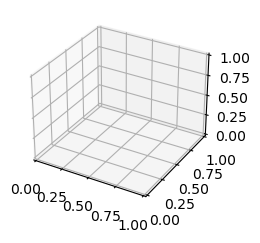

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define block dimensions
block_slots = 7
block_rows = 5
block_tiers = 4

fig = plt.figure(figsize=(18, 6))

# Create a meshgrid for block dimensions
for block in range(6):
    ax = fig.add_subplot(1, 6, block + 1, projection='3d')
    x, y, z = np.indices((block_slots, block_rows, block_tiers))

    # Set colors based on appointment time
    # For simplicity, we use a random color assignment here
    colors = np.random.rand(block_slots * block_rows * block_tiers).reshape((block_slots, block_rows, block_tiers))

    # Create filled voxel array
    filled = np.ones((block_slots, block_rows, block_tiers), dtype=bool)

    # Plot voxels
    ax.voxels(x, y, z, filled, facecolors=plt.cm.viridis(colors), edgecolors='k', linewidth=0.5)

    # Set labels
    ax.set_xlabel('Slots')
    ax.set_ylabel('Rows')
    ax.set_zlabel('Tiers')

    # Set title
    ax.set_title('Container block ' + str(block + 1))

plt.tight_layout()
plt.show()


In [10]:
import plotly.graph_objects as go

# You will need to replace this with your actual data
x = containers_df['slot']
y = containers_df['row']
z = containers_df['tier']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',    # choose a colorscale
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='Slot',
    yaxis_title='Row',
    zaxis_title='Tier'
))

fig.show()



NameError: name 'containers_df' is not defined

In [13]:
import random
from datetime import datetime, timedelta

# Define the size of the blocks
block_slots = 7
block_rows = 5
block_tiers = 4

# Create the yard
yard = [[[[None for _ in range(block_tiers)] for _ in range(block_rows)] for _ in range(block_slots)] for _ in range(5)]

# Create some containers with random appointment times
containers = [{'appointment_time': datetime.now() + timedelta(days=random.random() * 30)} for _ in range(block_slots * block_rows * block_tiers * len(yard))]

# Place the containers in the yard
for block in yard:
    for slot in range(block_slots):
        for row in range(block_rows):
            for tier in range(block_tiers):
                if containers:
                    block[slot][row][tier] = containers.pop(0)


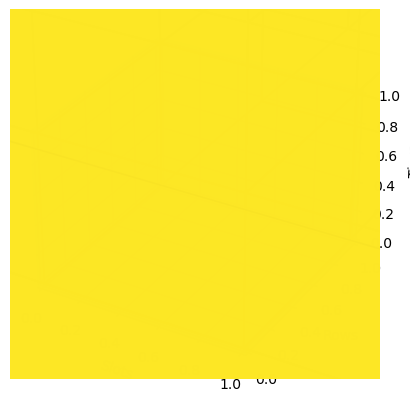

In [14]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def cube(x, y, z, color):
    return Poly3DCollection(
        [[(x, y, z), (x+1, y, z), (x+1, y+1, z), (x, y+1, z)],
         [(x, y, z), (x, y, z+1), (x, y+1, z+1), (x, y+1, z)],
         [(x, y, z), (x+1, y, z), (x+1, y, z+1), (x, y, z+1)],
         [(x+1, y, z+1), (x+1, y+1, z+1), (x+1, y+1, z), (x+1, y, z)],
         [(x+1, y+1, z+1), (x, y+1, z+1), (x, y+1, z), (x+1, y+1, z)],
         [(x+1, y+1, z+1), (x+1, y, z+1), (x, y, z+1), (x, y+1, z+1)]],
        facecolors=color,
        linewidths=1,
        edgecolors='k',
        alpha=0.5
    )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for block_num, block in enumerate(yard):
    for slot in range(block_slots):
        for row in range(block_rows):
            for tier in range(block_tiers):
                # Get the container in this position
                container = block[slot][row][tier]

                if container is not None:
                    # Convert the appointment time to a number so we can use it for coloring
                    color_num = container['appointment_time'].timestamp()

                    # Create the cube
                    cube_ = cube(block_num * (block_slots + 1) + slot, row, tier, plt.cm.viridis(color_num))

                    ax.add_collection3d(cube_)

ax.set_xlabel('Slots')
ax.set_ylabel('Rows')
ax.set_zlabel('Tiers')

plt.show()
